In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
covid_19_df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
covid_19_df['Date'] = pd.to_datetime(covid_19_df['Date'])
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
15442,Aruba,Netherlands,12.5186,-70.0358,2020-03-18,4,0,0
15443,NaN,Zambia,-15.4167,28.2833,2020-03-18,2,0,0
15444,NaN,Djibouti,11.8251,42.5903,2020-03-18,1,0,0
15445,NaN,"Gambia, The",13.4432,-15.3101,2020-03-18,1,0,0
15446,Montserrat,United Kingdom,16.7425,-62.1874,2020-03-18,1,0,0


In [3]:
date_range = covid_19_df['Date'].sort_values().drop_duplicates().dt.strftime('%d.%m').reset_index(drop=True)

In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
covid_19_df['Active'] = covid_19_df['Confirmed'] - covid_19_df['Deaths'] - covid_19_df['Recovered']
covid_19_df = covid_19_df.sort_values(by=['Date'], ascending=True)
covid_19_df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.000,101.0000,2020-01-22,2,0,0,2
172,Shanghai,China,31.202,121.4491,2020-01-22,9,0,0,9


### Finding Countries with most confirmed cases

In [5]:
last_covid_df = covid_19_df[covid_19_df['Date'] == covid_19_df['Date'].max()].reset_index(drop=True)
last_covid_df = last_covid_df.drop(columns=['Lat', 'Long'])
top_50 = last_covid_df.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(50)
top_50.head(2)

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
China,81102,3241,69755,8106
Italy,35713,2978,4025,28710


In [6]:
def prepare_data(func):
    def inside(df, country):
        df = df[df['Country/Region'] == country]
        if (country == 'China') | (country == 'US') | (country == 'Australia') | (country == 'Canada'):
            df = df.groupby('Date').sum()
        elif df[df['Province/State'] == country].notna().any().any():
            df = df[df['Province/State'] == country]
        func(df, country)
    return inside

In [7]:
@prepare_data
def show_increment(df, country):
    country_df = df.sort_values(by='Date').reset_index(drop=True)
    
    my_xticks = range(0, len(date_range), 10)
    l_date_range = list(date_range)
    my_xticks_labels = l_date_range[0:len(date_range):10]
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax = sns.lineplot(data=country_df[cases], ax=ax)
    ax.set_xticks(my_xticks)
    ax.set_xticklabels(my_xticks_labels)
    ax.set_xlabel(country)
    plt.show()

### Plots for 50 countries with most confirmed cases

0 . China
Confirmed: 81102 
Active: 8106 
Recovered: 69755 
Deaths: 3241


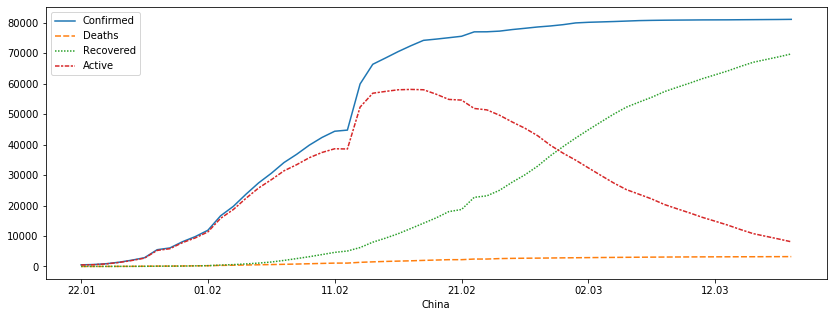

1 . Italy
Confirmed: 35713 
Active: 28710 
Recovered: 4025 
Deaths: 2978


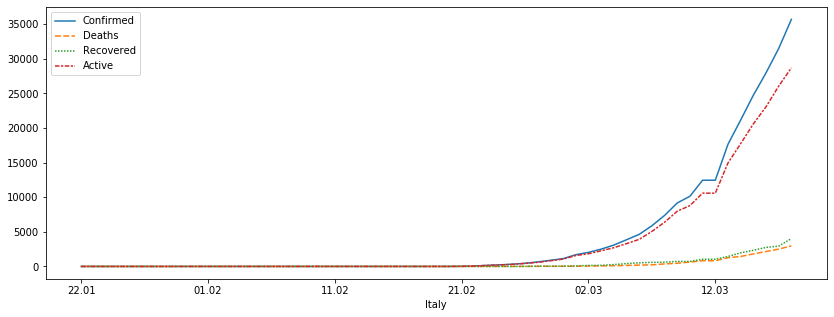

2 . Iran
Confirmed: 17361 
Active: 10837 
Recovered: 5389 
Deaths: 1135


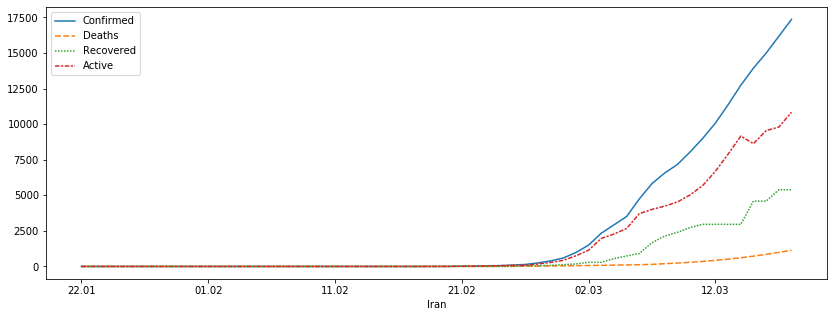

3 . Spain
Confirmed: 13910 
Active: 12206 
Recovered: 1081 
Deaths: 623


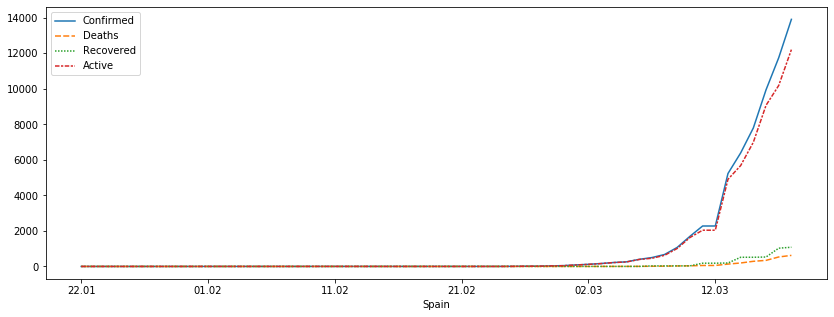

4 . Germany
Confirmed: 12327 
Active: 12194 
Recovered: 105 
Deaths: 28


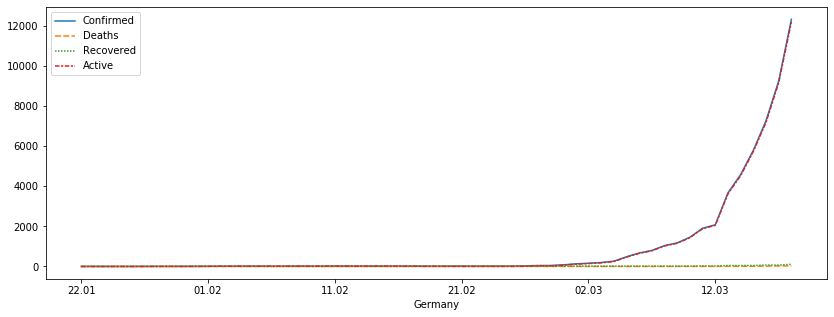

5 . France
Confirmed: 9105 
Active: 8945 
Recovered: 12 
Deaths: 148


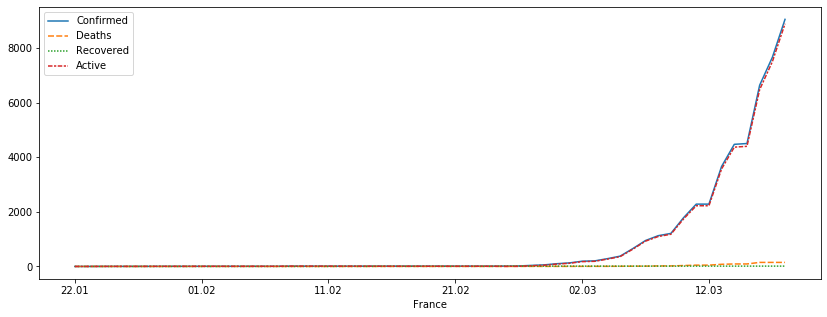

6 . Korea, South
Confirmed: 8413 
Active: 6789 
Recovered: 1540 
Deaths: 84


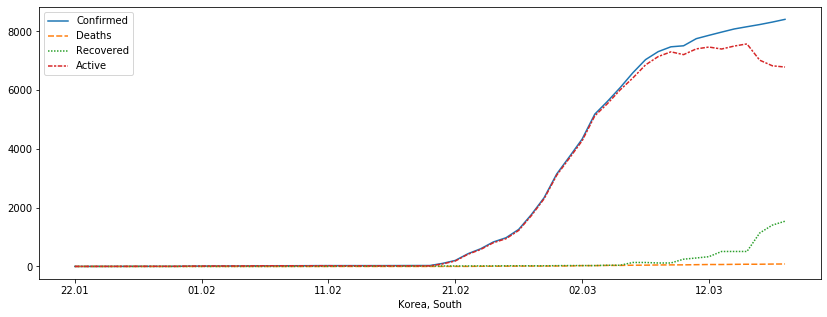

7 . US
Confirmed: 7783 
Active: 7665 
Recovered: 0 
Deaths: 118


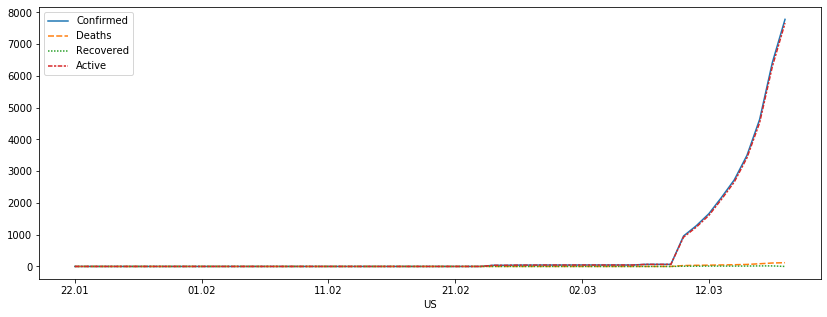

8 . Switzerland
Confirmed: 3028 
Active: 2985 
Recovered: 15 
Deaths: 28


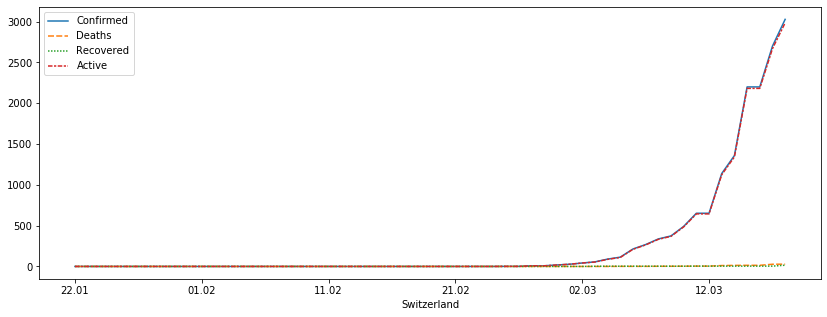

9 . United Kingdom
Confirmed: 2642 
Active: 2503 
Recovered: 67 
Deaths: 72


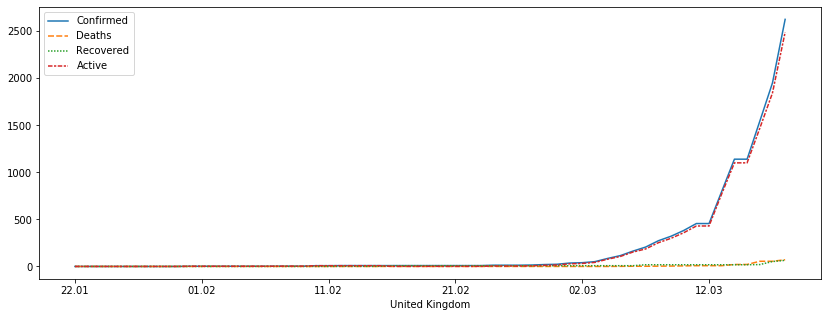

10 . Netherlands
Confirmed: 2058 
Active: 1998 
Recovered: 2 
Deaths: 58


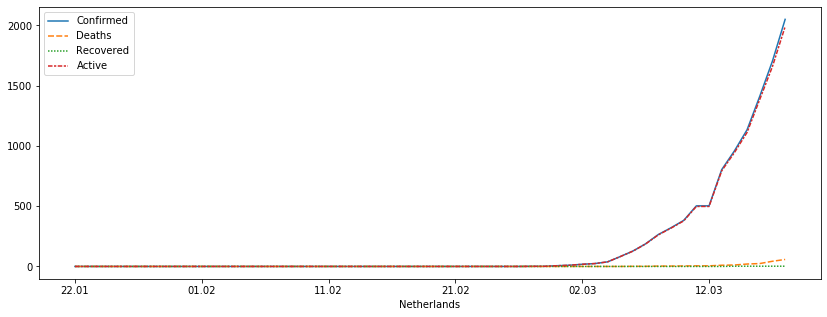

11 . Austria
Confirmed: 1646 
Active: 1633 
Recovered: 9 
Deaths: 4


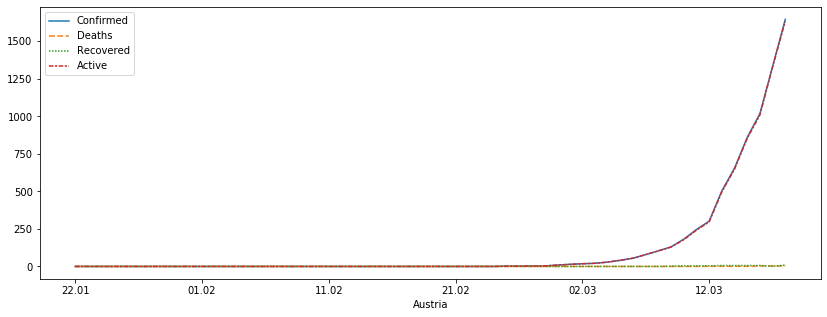

12 . Norway
Confirmed: 1550 
Active: 1543 
Recovered: 1 
Deaths: 6


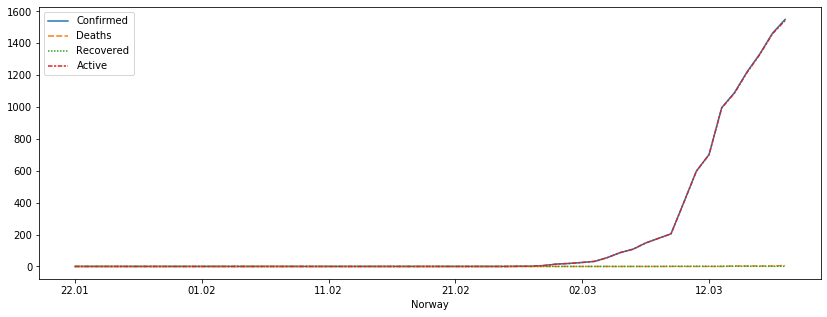

13 . Belgium
Confirmed: 1486 
Active: 1441 
Recovered: 31 
Deaths: 14


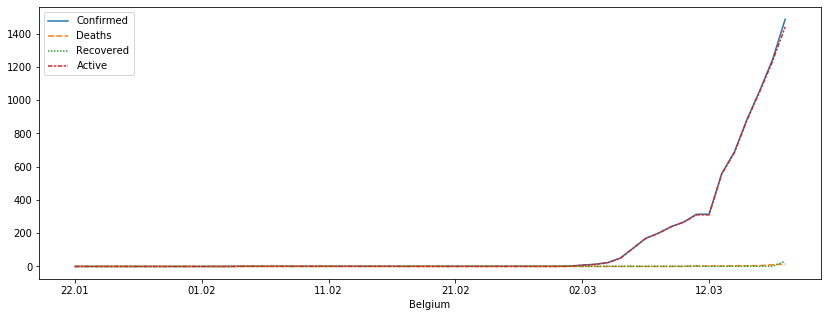

14 . Sweden
Confirmed: 1279 
Active: 1268 
Recovered: 1 
Deaths: 10


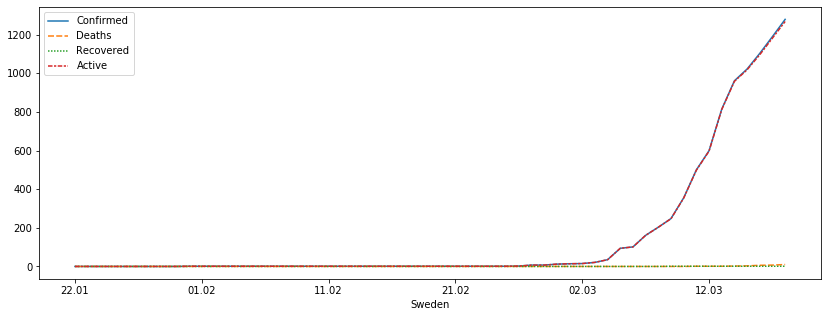

15 . Denmark
Confirmed: 1115 
Active: 1110 
Recovered: 1 
Deaths: 4


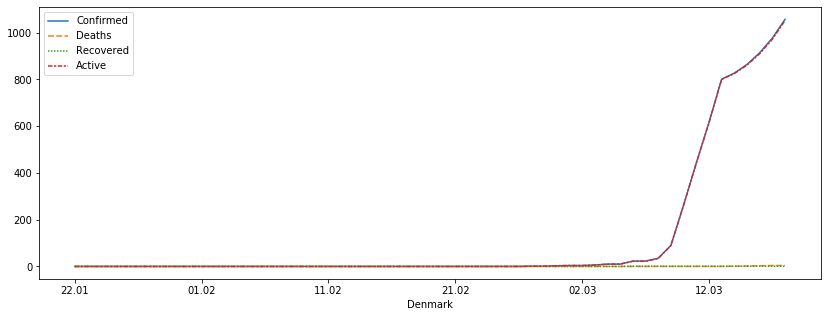

16 . Japan
Confirmed: 889 
Active: 716 
Recovered: 144 
Deaths: 29


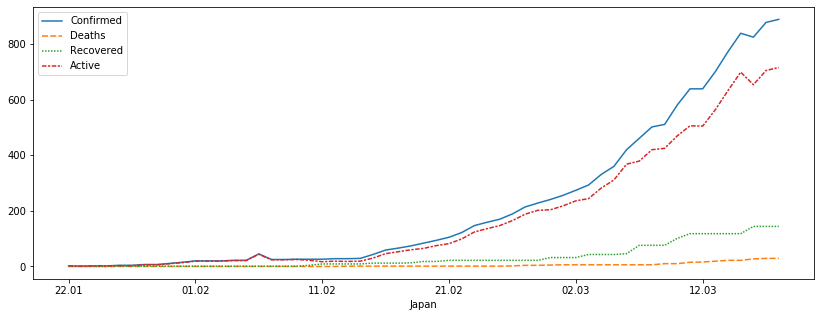

17 . Malaysia
Confirmed: 790 
Active: 728 
Recovered: 60 
Deaths: 2


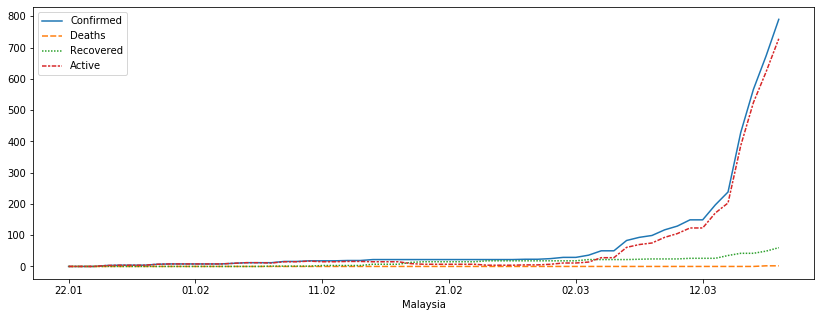

18 . Cruise Ship
Confirmed: 712 
Active: 380 
Recovered: 325 
Deaths: 7


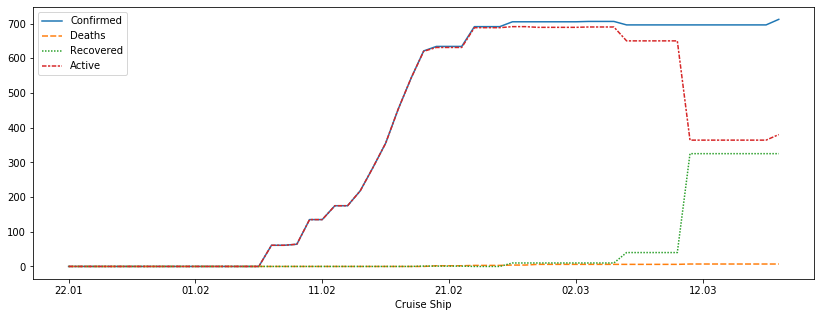

19 . Canada
Confirmed: 657 
Active: 640 
Recovered: 9 
Deaths: 8


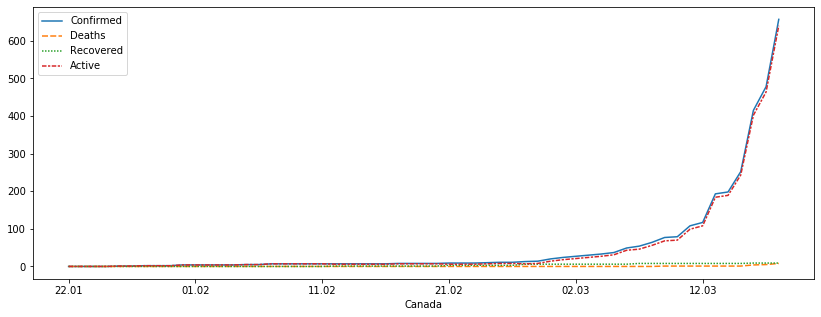

20 . Australia
Confirmed: 568 
Active: 539 
Recovered: 23 
Deaths: 6


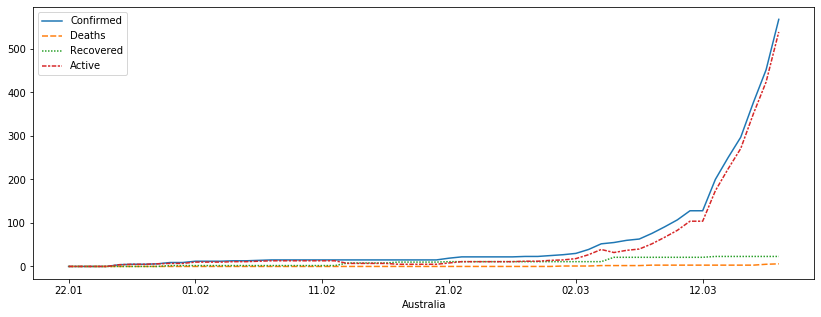

21 . Czechia
Confirmed: 464 
Active: 461 
Recovered: 3 
Deaths: 0


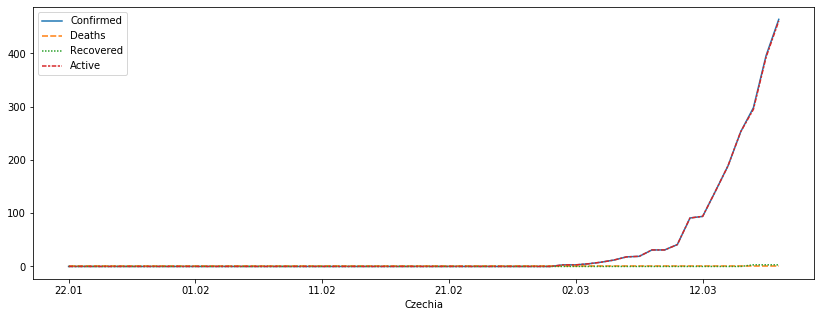

22 . Qatar
Confirmed: 452 
Active: 448 
Recovered: 4 
Deaths: 0


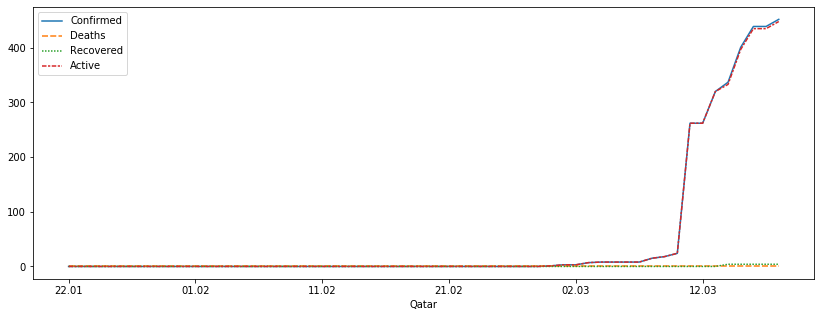

23 . Portugal
Confirmed: 448 
Active: 443 
Recovered: 3 
Deaths: 2


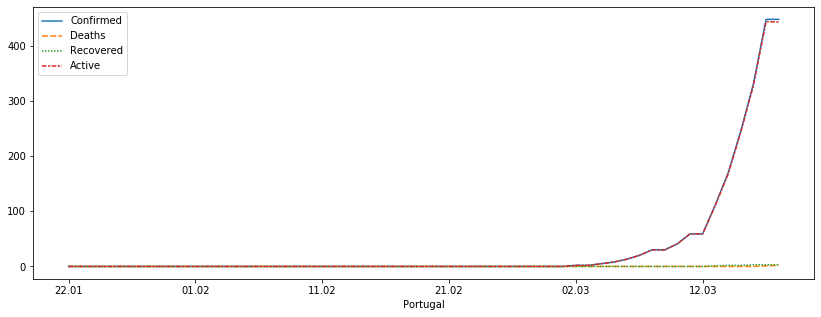

24 . Israel
Confirmed: 433 
Active: 422 
Recovered: 11 
Deaths: 0


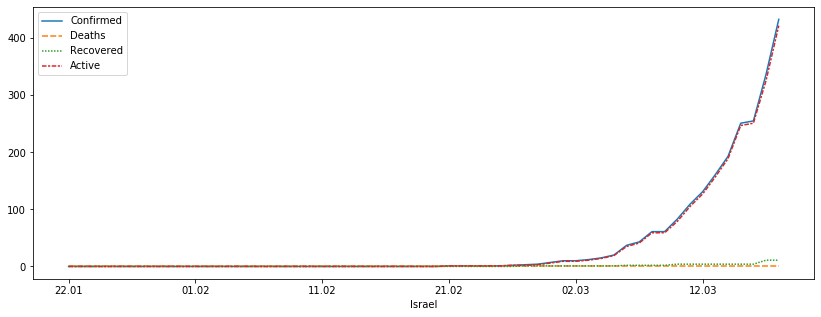

25 . Greece
Confirmed: 418 
Active: 405 
Recovered: 8 
Deaths: 5


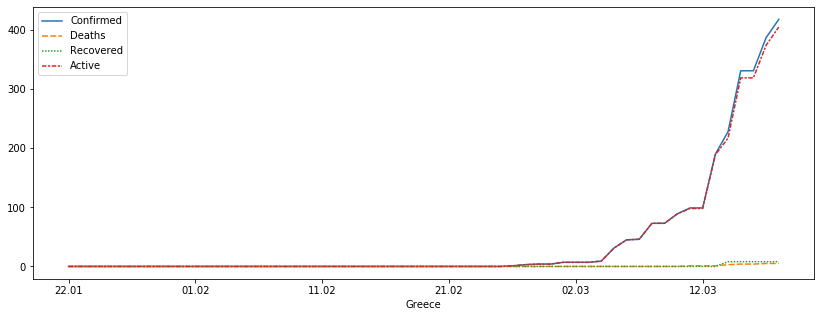

26 . Brazil
Confirmed: 372 
Active: 367 
Recovered: 2 
Deaths: 3


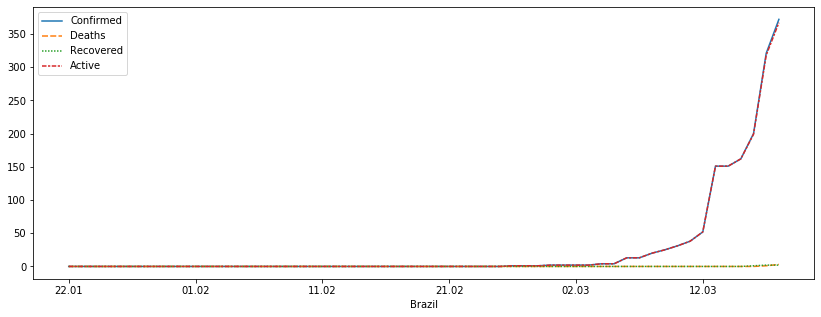

27 . Finland
Confirmed: 336 
Active: 326 
Recovered: 10 
Deaths: 0


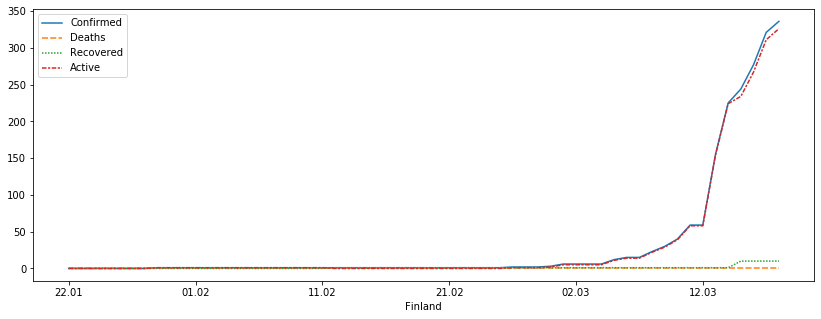

28 . Singapore
Confirmed: 313 
Active: 199 
Recovered: 114 
Deaths: 0


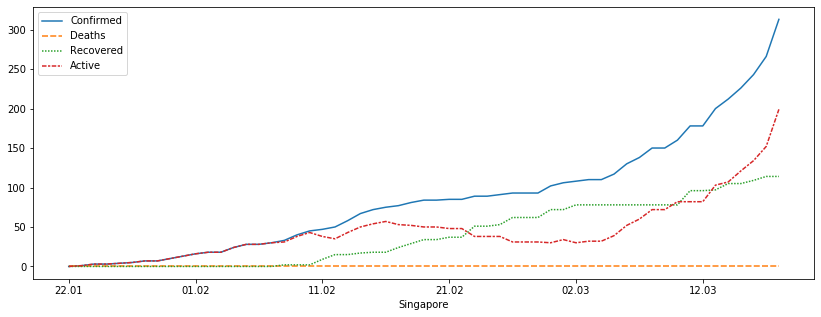

29 . Pakistan
Confirmed: 299 
Active: 297 
Recovered: 2 
Deaths: 0


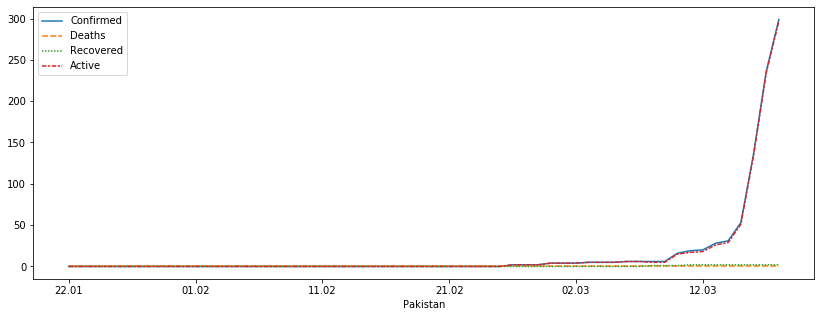

30 . Ireland
Confirmed: 292 
Active: 285 
Recovered: 5 
Deaths: 2


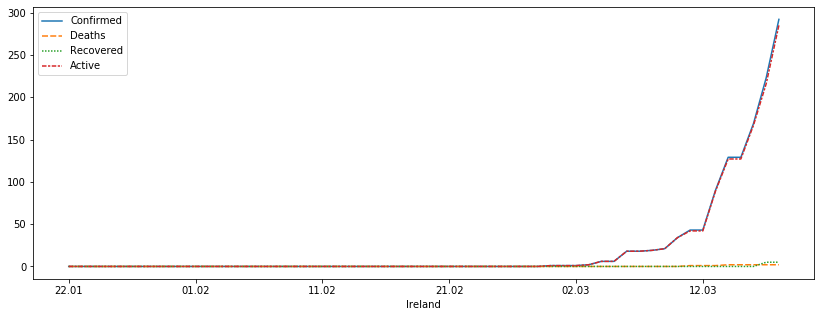

31 . Slovenia
Confirmed: 275 
Active: 274 
Recovered: 0 
Deaths: 1


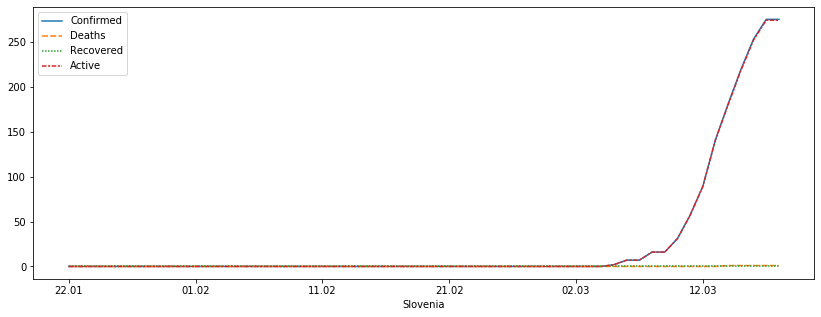

32 . Romania
Confirmed: 260 
Active: 241 
Recovered: 19 
Deaths: 0


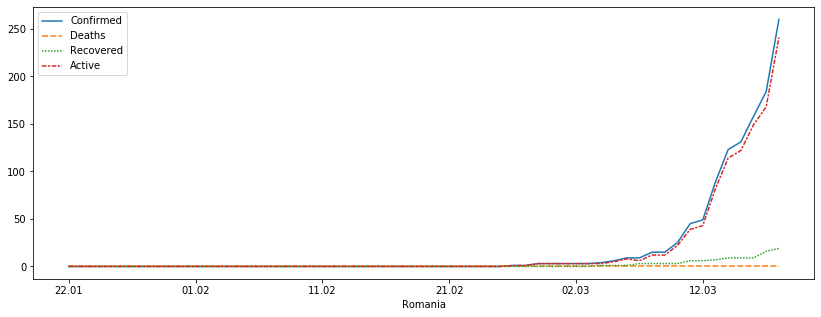

33 . Estonia
Confirmed: 258 
Active: 257 
Recovered: 1 
Deaths: 0


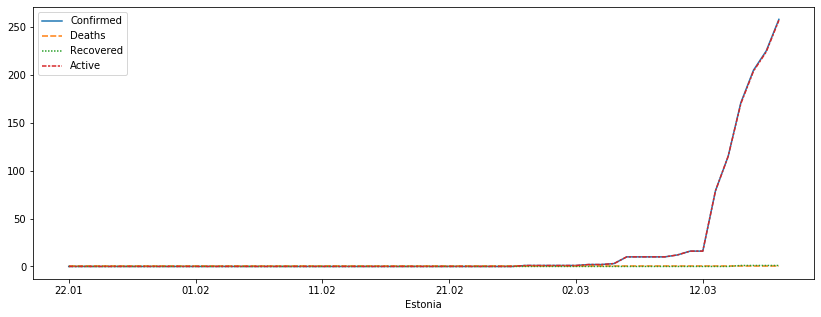

34 . Bahrain
Confirmed: 256 
Active: 167 
Recovered: 88 
Deaths: 1


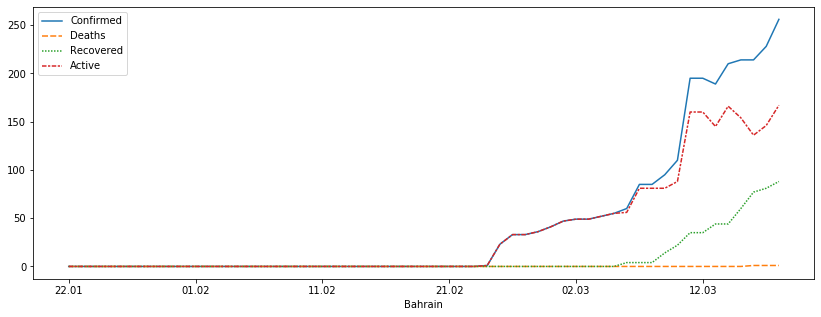

35 . Poland
Confirmed: 251 
Active: 233 
Recovered: 13 
Deaths: 5


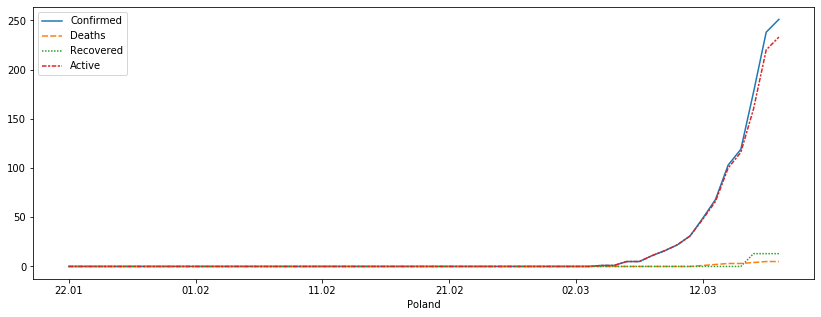

36 . Iceland
Confirmed: 250 
Active: 244 
Recovered: 5 
Deaths: 1


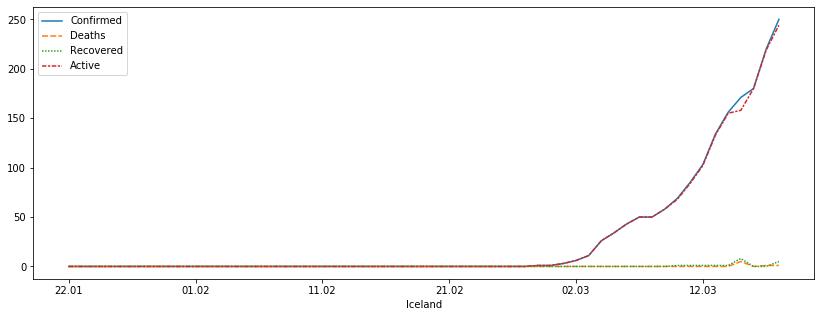

37 . Chile
Confirmed: 238 
Active: 238 
Recovered: 0 
Deaths: 0


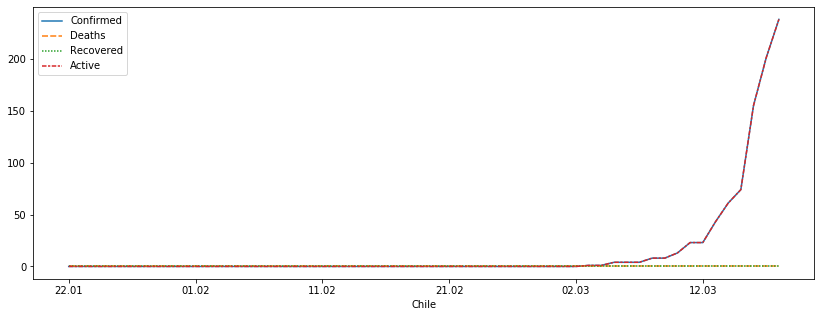

38 . Indonesia
Confirmed: 227 
Active: 197 
Recovered: 11 
Deaths: 19


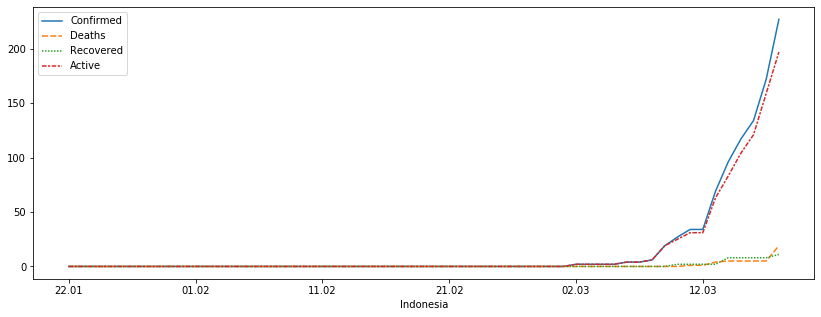

39 . Thailand
Confirmed: 212 
Active: 169 
Recovered: 42 
Deaths: 1


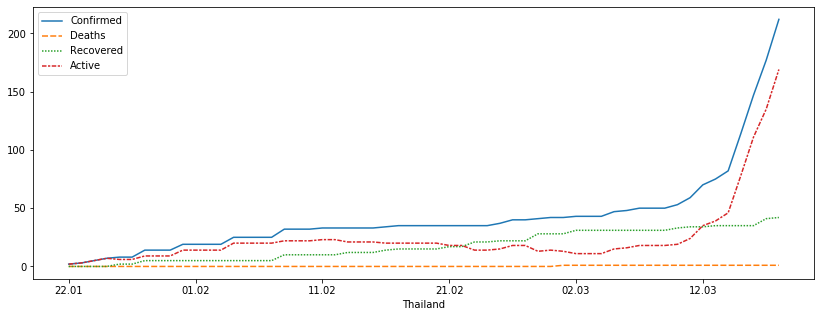

40 . Luxembourg
Confirmed: 203 
Active: 201 
Recovered: 0 
Deaths: 2


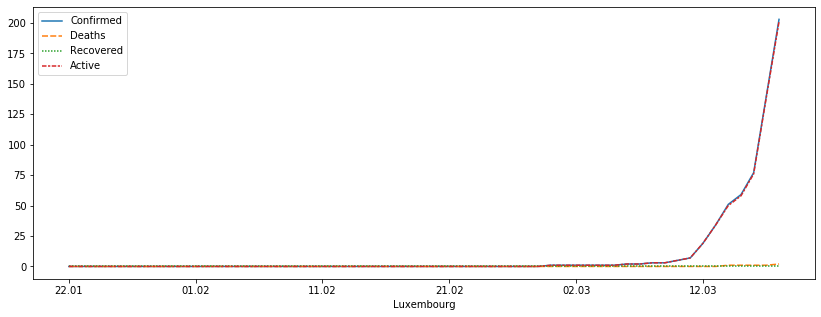

41 . Philippines
Confirmed: 202 
Active: 178 
Recovered: 5 
Deaths: 19


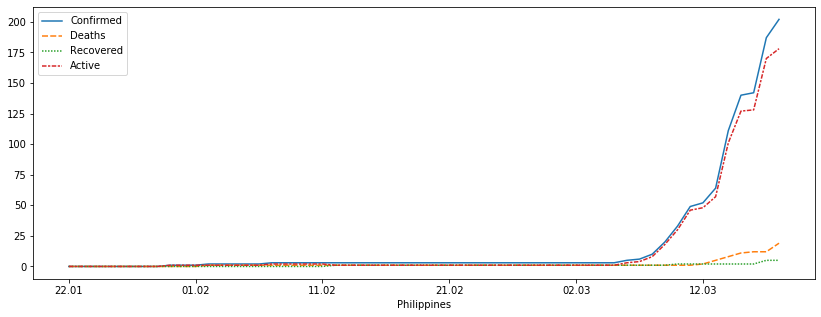

42 . Egypt
Confirmed: 196 
Active: 158 
Recovered: 32 
Deaths: 6


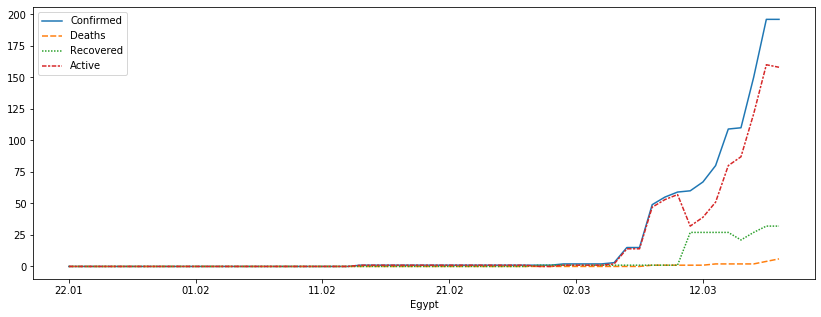

43 . Saudi Arabia
Confirmed: 171 
Active: 165 
Recovered: 6 
Deaths: 0


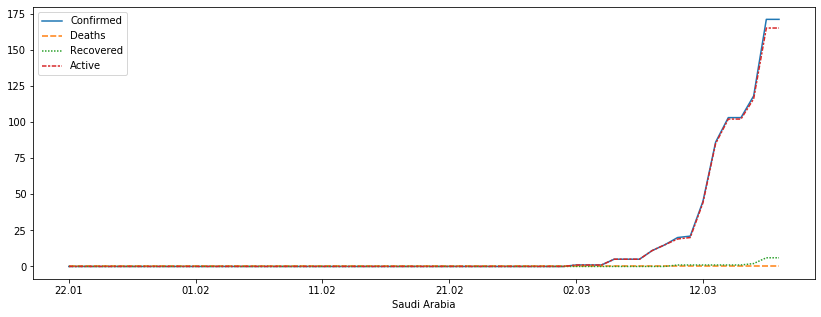

44 . Iraq
Confirmed: 164 
Active: 109 
Recovered: 43 
Deaths: 12


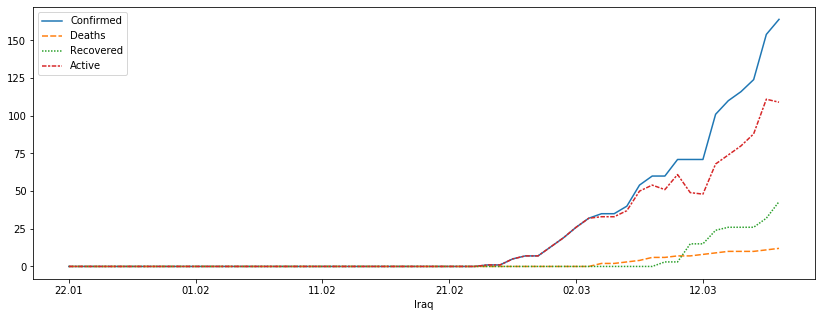

45 . India
Confirmed: 156 
Active: 139 
Recovered: 14 
Deaths: 3


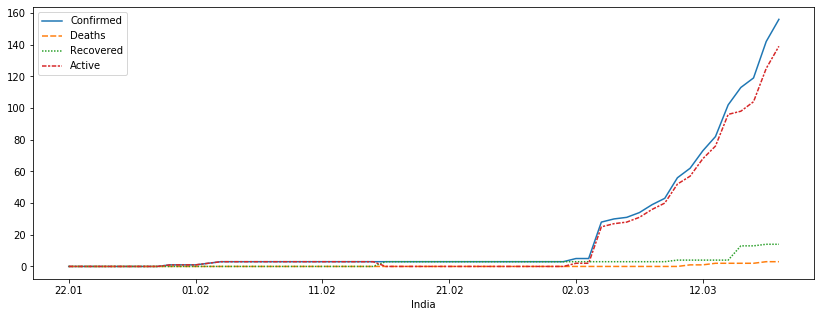

46 . Russia
Confirmed: 147 
Active: 139 
Recovered: 8 
Deaths: 0


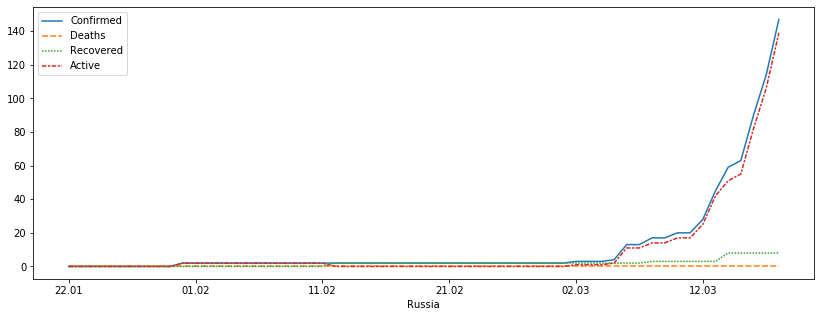

47 . Peru
Confirmed: 145 
Active: 144 
Recovered: 1 
Deaths: 0


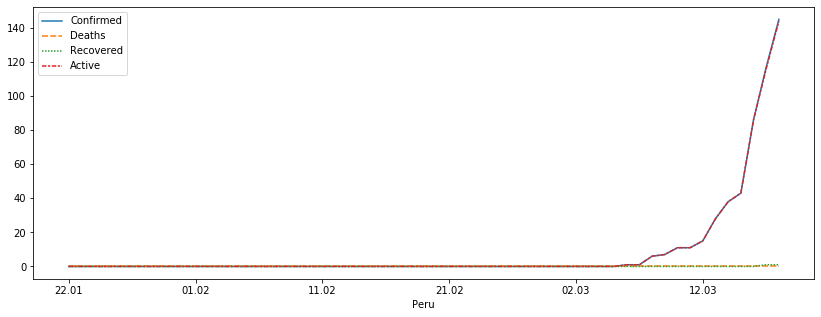

48 . Kuwait
Confirmed: 142 
Active: 127 
Recovered: 15 
Deaths: 0


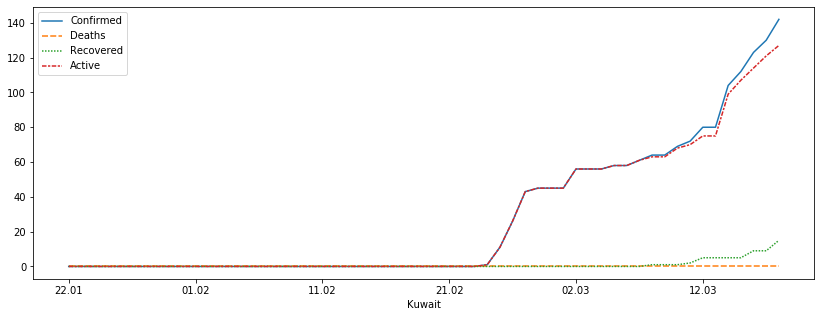

49 . Lebanon
Confirmed: 133 
Active: 127 
Recovered: 3 
Deaths: 3


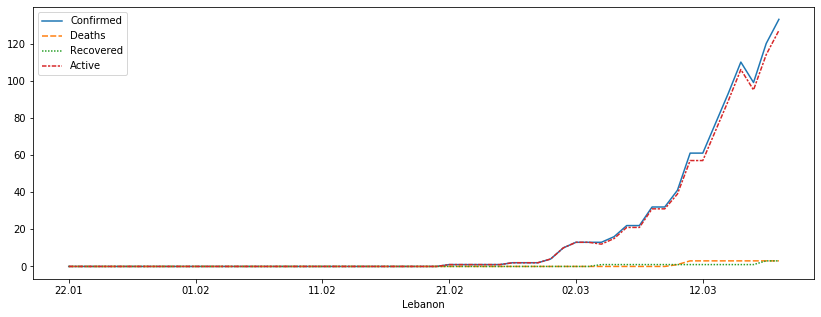

In [30]:
for index, country in enumerate(top_50.index):
    print(index,'.', country)
    print('Confirmed:', top_50.Confirmed[country],'\n'\
          'Active:', top_50.Active[country],'\n'\
          'Recovered:', top_50.Recovered[country],'\n'\
          'Deaths:', top_50.Deaths[country]
         )
    show_increment(covid_19_df, country)